In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Amir Hassan/Desktop/Python/train.csv', skipinitialspace=True)

In [3]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


# Handling Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

Missing values before handling:
name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64


In [5]:

# Numerical columns: Fill missing values with mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Categorical columns: Fill missing values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
# Verify if missing values are filled
missing_values_after_filling = df.isnull().sum()
print("\nMissing Values After Filling:")
print(missing_values_after_filling)


Missing Values After Filling:
name                     0
duration_ms              0
explicit                 0
popularity               0
artists                  0
album_name               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
features_duration_ms     0
time_signature           0
n_beats                  0
n_bars                   0
popularity_confidence    0
processing               0
genre                    0
dtype: int64


In [7]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.000000,567.0,141.0,0.490479,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.000000,617.0,155.0,0.490479,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.000000,652.0,162.0,0.490479,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.000000,619.0,155.0,0.469000,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.000000,733.0,183.0,0.490479,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,3.876179,837.0,212.0,0.490479,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.000000,277.0,92.0,0.490479,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.000000,837.0,209.0,0.490479,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.000000,513.0,130.0,0.490479,1.279305,breakbeat


In [8]:
df['log_transformed_popularity'] = np.log(df['popularity' ]+ 1)

In [9]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,log_transformed_popularity
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.6350,142.221,241760,4.0,567.0,141.0,0.490479,1.279305,j-dance,3.850148
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.0336,75.596,444000,4.0,617.0,155.0,0.490479,2.367412,iranian,0.000000
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.4890,116.628,333507,4.0,652.0,162.0,0.490479,3.700483,black-metal,1.386294
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469000,1.279305,bluegrass,3.178054
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.6370,143.956,307652,4.0,733.0,183.0,0.490479,4.067086,happy,3.258097


In [10]:
# missing values
df["popularity_confidence"] = df["popularity_confidence"].fillna(df["popularity_confidence"].mode()[0])
df['key'] = df.groupby(['artists', 'album_name'])['key'].transform(lambda x: x.fillna(x.median()))

# remove useless variables
column2drop = [ "name", "popularity_confidence","features_duration_ms","n_beats","processing","n_bars", "artists", "album_name"]
df.drop(column2drop, axis=1, inplace=True)

In [11]:
unique_keys = df['key'].unique()

# Display the unique values
print(unique_keys)

[ 5  1  2  7  4  6  9  8  0 10  3 11]


In [12]:
keys = {
    0: 'Key_1',
    1: 'Key_2',
    2: 'Key_3',
    3: 'Key_4',
    4: 'Key_5',
    5: 'Key_6',
    6: 'Key_7',
    7: 'Key_8',
    8: 'Key_9',
    9: 'Key_10',
    10: 'Key_11',
    11: 'Key_12'
}

df["key"] = df["key"].map(keys)

In [13]:
keys = {
    1: "Major",
    0: 'Minor'
}

df["mode"] = df["mode"].map(keys)

In [14]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,log_transformed_popularity
0,241760,False,46,0.690,0.513,Key_6,-12.529,Major,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3.850148
1,444000,False,0,0.069,0.196,Key_2,-24.801,Minor,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,0.000000
2,333506,False,3,0.363,0.854,Key_3,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,1.386294
3,269800,False,23,0.523,0.585,Key_6,-5.607,Major,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,3.178054
4,307651,False,25,0.643,0.687,Key_8,-11.340,Major,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,3.258097


In [15]:
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
#  df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

df['duration_msBin'] = pd.qcut(df['duration_ms'], 3, labels=["Short duration", "Medium duration", "Long duration"], duplicates='drop')
df['popularityBin'] = pd.qcut(df['log_transformed_popularity'], 3, labels=["Low Popularity", "Moderate Popularity", "High Popularity"], duplicates='drop')
df['loudnessBin'] = pd.qcut(df['loudness'], 3, labels=["Low Loudness", "Medium Loudness", "High Loudness"], duplicates='drop')
df['tempoBin'] = pd.qcut(df['tempo'], 3, labels=["Slow Tempo", "Moderate Tempo", "Fast Tempo"], duplicates='drop')
# df['modeBin'] = pd.cut(df['mode'], bins=2, labels=["Minor", "Major"])
df['time_signatureBin'] = pd.cut(df['time_signature'], bins=3, labels=["TSigBin1", "TSigBin2", "TSigBin3"])
# df['genreBin'] = pd.cut(df['genre_encoded'], bins=3, labels=["Rock", "Jazz", "Pop"])

# df['keyBin'] = round(df[''])  # Rounded to nearest integer for simplicity

df['danceabilityBin'] = pd.qcut(df['danceability'], 3, labels=["Rhythmic", "Moderate", "Smooth"], duplicates='drop')
df['energyBin'] = pd.qcut(df['energy'], 3, labels=["Low Energy", "Medium Energy", "High Energy"], duplicates='drop')
df['speechinessBin'] = pd.qcut(df['speechiness'], 3, labels=["low-speech", "Moderate speech", "Highly speech"], duplicates='drop')
df['acousticnessBin'] = pd.qcut(df['acousticness'], 3, labels=["Not Acoustic", "Moderately Acoustic", "Highly Acoustic"], duplicates='drop')
df['instrumentalnessBin'] = pd.qcut(df['instrumentalness'], 3, labels=["Low Instrumentation", "Partial Instrumentation", "high Instrumentation"], duplicates='drop')
df['livenessBin'] = pd.qcut(df['liveness'], 3, labels=["Studio Recording", "Live Feel", "Live Performance"], duplicates='drop')
df['valenceBin'] = pd.qcut(df['valence'], 3, labels=["Low Valence", "Medium Valence", "High Valence"], duplicates='drop')

# Drop columns individually
df.drop(['duration_ms','popularity', 'key','log_transformed_popularity', 'mode', 'time_signature', 'loudness', 'tempo', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'], axis=1, inplace=True)


In [16]:
# df['keyBin'].unique()
# df['genreBin'].unique()

In [17]:
df

,explicit,genre,duration_msBin,popularityBin,loudnessBin,tempoBin,time_signatureBin,danceabilityBin,energyBin,speechinessBin,acousticnessBin,instrumentalnessBin,livenessBin,valenceBin
0,False,j-dance,Medium duration,High Popularity,Low Loudness,Fast Tempo,TSigBin3,Smooth,Low Energy,Highly speech,Moderately Acoustic,high Instrumentation,Live Performance,High Valence
1,False,iranian,Long duration,Low Popularity,Low Loudness,Slow Tempo,TSigBin3,Rhythmic,Low Energy,Highly speech,Moderately Acoustic,high Instrumentation,Live Performance,Low Valence
2,False,black-metal,Long duration,Low Popularity,Medium Loudness,Moderate Tempo,TSigBin3,Rhythmic,High Energy,low-speech,Not Acoustic,high Instrumentation,Live Performance,Medium Valence
3,False,bluegrass,Long duration,Moderate Popularity,High Loudness,Fast Tempo,TSigBin3,Moderate,Medium Energy,Highly speech,Moderately Acoustic,Partial Instrumentation,Live Feel,Medium Valence
4,False,happy,Long duration,Moderate Popularity,Low Loudness,Fast Tempo,TSigBin3,Moderate,Medium Energy,Moderate speech,Not Acoustic,Partial Instrumentation,Live Performance,High Valence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,idm,Long duration,Low Popularity,Low Loudness,Moderate Tempo,TSigBin3,Moderate,Medium Energy,Moderate speech,Not Acoustic,high Instrumentation,Live Feel,Low Valence
14996,False,sleep,Short duration,High Popularity,Low Loudness,Slow Tempo,TSigBin2,Rhythmic,High Energy,Moderate speech,Highly Acoustic,high Instrumentation,Live Feel,Low Valence
14997,False,techno,Long duration,High Popularity,Medium Loudness,Moderate Tempo,TSigBin3,Smooth,Low Energy,Moderate speech,Not Acoustic,high Instrumentation,Studio Recording,Low Valence
14998,False,breakbeat,Medium duration,High Popularity,High Loudness,Fast Tempo,TSigBin3,Moderate,High Energy,Moderate speech,Not Acoustic,Partial Instrumentation,Live Performance,Medium Valence


In [18]:
# df["keyBin"] = df["keyBin"].astype(str) + "_Key"
# df["genreBin"] = df["genreBin"].astype(str) + "_music"


In [19]:
df.head()

,explicit,genre,duration_msBin,popularityBin,loudnessBin,tempoBin,time_signatureBin,danceabilityBin,energyBin,speechinessBin,acousticnessBin,instrumentalnessBin,livenessBin,valenceBin
0,False,j-dance,Medium duration,High Popularity,Low Loudness,Fast Tempo,TSigBin3,Smooth,Low Energy,Highly speech,Moderately Acoustic,high Instrumentation,Live Performance,High Valence
1,False,iranian,Long duration,Low Popularity,Low Loudness,Slow Tempo,TSigBin3,Rhythmic,Low Energy,Highly speech,Moderately Acoustic,high Instrumentation,Live Performance,Low Valence
2,False,black-metal,Long duration,Low Popularity,Medium Loudness,Moderate Tempo,TSigBin3,Rhythmic,High Energy,low-speech,Not Acoustic,high Instrumentation,Live Performance,Medium Valence
3,False,bluegrass,Long duration,Moderate Popularity,High Loudness,Fast Tempo,TSigBin3,Moderate,Medium Energy,Highly speech,Moderately Acoustic,Partial Instrumentation,Live Feel,Medium Valence
4,False,happy,Long duration,Moderate Popularity,Low Loudness,Fast Tempo,TSigBin3,Moderate,Medium Energy,Moderate speech,Not Acoustic,Partial Instrumentation,Live Performance,High Valence


In [20]:
#we work on the list
X = df.values.tolist()

In [21]:
X[0]

[False,
 'j-dance',
 'Medium duration',
 'High Popularity',
 'Low Loudness',
 'Fast Tempo',
 'TSigBin3',
 'Smooth',
 'Low Energy',
 'Highly speech',
 'Moderately Acoustic',
 'high Instrumentation',
 'Live Performance',
 'High Valence']

In [22]:
X[1]

[False,
 'iranian',
 'Long duration',
 'Low Popularity',
 'Low Loudness',
 'Slow Tempo',
 'TSigBin3',
 'Rhythmic',
 'Low Energy',
 'Highly speech',
 'Moderately Acoustic',
 'high Instrumentation',
 'Live Performance',
 'Low Valence']

In [23]:
# !pip install pyfim

In [24]:
from fim import apriori

In [25]:
### Frequent Itemset

In [38]:
# supp = 2  # 2%
supp = 10  # 20%
zmin = 5  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(High Energy, High Loudness, Not Acoustic, TSi...",11.080000
1,"(Highly Acoustic, Low Loudness, Low Energy, TS...",13.666667


In [27]:
### Closed Itemsets

In [30]:
# supp = 2  # 2%
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(Live Feel, TSigBin3, False)",27.580000
1,"(High Popularity, Low Instrumentation, TSigBin3)",15.240000
2,"(High Popularity, Low Instrumentation, False)",15.053333
3,"(High Popularity, TSigBin3, False)",28.373333
4,"(Moderate Popularity, TSigBin3, False)",27.906667
...,...,...
66,"(Medium Energy, TSigBin3, False)",29.513333
67,"(Moderate, TSigBin3, False)",29.786667
68,"(low-speech, TSigBin3, False)",29.493333
69,"(Studio Recording, TSigBin3, False)",29.040000


In [31]:
### Maximal Itemsets

In [32]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(Live Feel, TSigBin3, False)",27.580000
1,"(High Popularity, Low Instrumentation, TSigBin3)",15.240000
2,"(High Popularity, Low Instrumentation, False)",15.053333
3,"(High Popularity, TSigBin3, False)",28.373333
4,"(Moderate Popularity, TSigBin3, False)",27.906667
5,"(Moderate speech, TSigBin3, False)",28.940000
6,"(High Energy, High Loudness, TSigBin3, False)",18.900000
7,"(High Energy, Not Acoustic, TSigBin3, False)",17.180000
8,"(Smooth, High Valence, TSigBin3, False)",16.106667
9,"(Smooth, Moderate Tempo, TSigBin3)",15.840000


In [33]:
### Support plots

In [34]:
#### Support vs number of itemsets

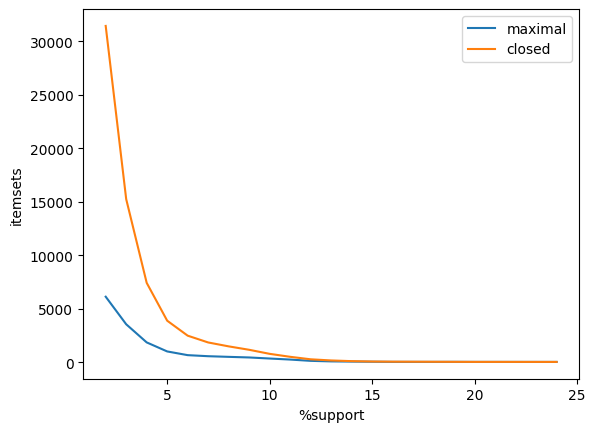

In [35]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [380]:
#### Support vs number of itemset for survived / not survived

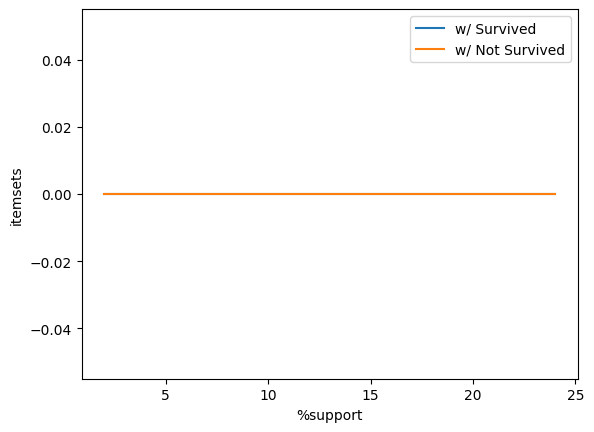

In [381]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "Survived" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "Not Survived" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Survived")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Not Survived")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [382]:
### Rules

In [383]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [384]:
# if the target is association rules:
#                 a list of rules (i.e. tuples with two or more elements),
#                 each consisting of a head/consequent item, a tuple with
#                 a body/antecedent item set, and the values selected by
#                 the parameter 'report', which may be combined into a
#                 tuple or a list if report[0] is '(' or '[', respectively.

In [385]:
conf = 70  
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
32,Low Loudness,"(Highly Acoustic, high Instrumentation, Low En...",1408,9.386667,0.922069,2.766208
36,Low Energy,"(Highly Acoustic, Slow Tempo, Low Loudness, Fa...",1394,9.293333,0.915299,2.740963
56,Low Energy,"(Highly Acoustic, Low Loudness, Low Valence, F...",1486,9.906667,0.911656,2.730055
52,Low Energy,"(Highly Acoustic, Low Loudness, Rhythmic, False)",1463,9.753333,0.901417,2.699392
64,Low Energy,"(Highly Acoustic, Low Loudness, TSigBin3, False)",2050,13.666667,0.894415,2.678425
...,...,...,...,...,...,...
83,TSigBin3,"(high Instrumentation, Low Loudness, Low Valen...",1292,8.613333,0.733258,0.808919
102,TSigBin3,"(Low Loudness, Low Valence, Low Energy, False)",1420,9.466667,0.731959,0.807486
72,TSigBin3,"(Highly Acoustic, Rhythmic, Low Energy, False)",1213,8.086667,0.710603,0.783927
59,TSigBin3,"(Highly Acoustic, Low Loudness, Low Valence, F...",1155,7.700000,0.708589,0.781704


### Classification

In [386]:
rules_df[rules_df["consequent"] == "Highly Acoustic"]
# try to put here genra here sleep then see result

,consequent,antecedent,abs_support,%_support,confidence,lift
3,Highly Acoustic,"(Live Feel, Low Energy, TSigBin3, False)",1251,8.340000,0.736315,2.211600
33,Highly Acoustic,"(high Instrumentation, Low Loudness, Low Energ...",1408,9.386667,0.733333,2.202643
38,Highly Acoustic,"(Slow Tempo, Low Loudness, Low Energy, False)",1394,9.293333,0.786238,2.361548
40,Highly Acoustic,"(Slow Tempo, Low Loudness, TSigBin3, False)",1178,7.853333,0.702864,2.111125
43,Highly Acoustic,"(Slow Tempo, Low Energy, TSigBin3, False)",1363,9.086667,0.742375,2.229800
46,Highly Acoustic,"(Low Loudness, Short duration, Low Energy, False)",1362,9.080000,0.804014,2.414940
48,Highly Acoustic,"(Low Loudness, Short duration, TSigBin3, False)",1156,7.706667,0.722500,2.170104
51,Highly Acoustic,"(Low Loudness, Rhythmic, Low Valence, False)",1259,8.393333,0.722318,2.169557
54,Highly Acoustic,"(Low Loudness, Rhythmic, Low Energy, False)",1463,9.753333,0.818691,2.459022
55,Highly Acoustic,"(Low Loudness, Rhythmic, TSigBin3, False)",1114,7.426667,0.715938,2.150395


In [387]:
print("to_predict:", [r for r in rules if r[0] == "Highly Acoustic"][0][0])
print("how?", [r for r in rules if r[0] == "Highly Acoustic"][0][1])

to_predict: Highly Acoustic
how? ('Live Feel', 'Low Energy', 'TSigBin3', False)


In [388]:
print("to_predict:", [r for r in rules if r[0] == "Low Loudness"][0][0])
print("how?", [r for r in rules if r[0] == "Low Loudness"][0][1])

to_predict: Low Loudness
how? ('Live Feel', 'Highly Acoustic', 'Low Energy', False)


In [404]:
df_test = pd.read_csv('C:/Users/Amir Hassan/Desktop/Python/test.csv', skipinitialspace=True)

In [405]:
# Check for missing values
missing_values = df_test.isnull().sum()
print("Missing values before handling:")
print(missing_values)




Missing values before handling:
name                        0
duration_ms                 0
explicit                    0
popularity                  0
artists                     0
album_name                  0
danceability                0
energy                      0
key                         0
loudness                    0
mode                     1461
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
features_duration_ms        0
time_signature            725
n_beats                     0
n_bars                      0
popularity_confidence    4279
processing                  0
genre                       0
dtype: int64


In [391]:
# Numerical columns: Fill missing values with mean
numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df_test[col].fillna(df_test[col].mean(), inplace=True)

# Categorical columns: Fill missing values with mode
categorical_columns = df_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)
    
# Verify if missing values are filled
missing_values_after_filling = df.isnull().sum()
print("\nMissing Values After Filling:")
print(missing_values_after_filling)



Missing Values After Filling:
explicit               0
genre                  0
duration_msBin         0
popularityBin          0
loudnessBin            0
tempoBin               0
time_signatureBin      0
danceabilityBin        0
energyBin              0
speechinessBin         0
acousticnessBin        0
instrumentalnessBin    0
livenessBin            0
valenceBin             0
dtype: int64


In [406]:
df_test

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.9510,0,-3.743,...,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.5790,5,-9.136,...,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.7780,9,-4.803,...,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558,indian
3,いじわるなハロー,247040,False,25,Perfume,Cling Cling,0.500,0.9580,0,-1.695,...,0.7320,0.955,130.059,247040,4.0,526.0,132.0,NaN,3.349057,j-idol
4,Hit The Ceiling,208120,False,0,Audio Bullys,Ego War,0.802,0.6840,1,-8.839,...,0.2360,0.637,130.022,208120,4.0,440.0,110.0,NaN,2.367412,breakbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Ich war es,80813,False,17,Germaine Franco,Encanto (Deutscher Original Film-Soundtrack),0.217,0.0754,11,-16.629,...,0.1350,0.201,142.026,80813,5.0,175.0,44.0,0.728,0.748116,disney
4996,Giahe Vahshi,261500,False,2,Saeed Dehghan;Pari Eskandari;Beatbynajwa,Oryan,0.467,0.7820,10,-8.136,...,0.0971,0.203,145.059,261500,4.0,621.0,158.0,NaN,0.757389,iranian
4997,Taste - Reaper Remix,258000,False,19,Shiv-R,"Infacted Compilation, Vol. 5",0.524,0.9730,0,-5.214,...,0.1070,0.840,140.029,258000,4.0,594.0,149.0,NaN,3.349057,industrial
4998,Romove,404506,False,19,Skyforger,Senprusija,0.166,0.9750,2,-3.585,...,0.0656,0.233,75.005,404507,4.0,550.0,138.0,NaN,3.700483,black-metal


In [393]:
# df_test.head()

In [407]:
df['explicit']

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: explicit, Length: 15000, dtype: bool

In [415]:
#Prep Prediction

keys = {
    1: "True",
    0: "False"
    
#      "True": 1,
#      "False": 0
}


# df_test["explicit"] = df_test["explicit"].map(keys)

#non important features, update, to observe if results will imporve
drop_columns = [ "name", "artists","album_name","genre"]


#split train dataset into x-train and y-train
X_test, y_test = df_test.drop(drop_columns, axis=1), df_test['explicit']

In [416]:
df_test["explicit"]

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: explicit, Length: 5000, dtype: bool

In [417]:
df_test.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,...,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,...,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,...,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558,indian
3,いじわるなハロー,247040,False,25,Perfume,Cling Cling,0.500,0.958,0,-1.695,...,0.7320,0.955,130.059,247040,4.0,526.0,132.0,NaN,3.349057,j-idol
4,Hit The Ceiling,208120,False,0,Audio Bullys,Ego War,0.802,0.684,1,-8.839,...,0.2360,0.637,130.022,208120,4.0,440.0,110.0,NaN,2.367412,breakbeat


In [418]:
y_test

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: explicit, Length: 5000, dtype: bool

In [419]:
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
0,206826,False,32,0.383,0.9510,0,-3.743,1.0,0.1040,0.006070,0.000000,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057
1,329733,False,41,0.464,0.5790,5,-9.136,1.0,0.0596,0.281000,0.827000,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305
2,136000,False,40,0.611,0.7780,9,-4.803,1.0,0.0326,0.094600,0.000005,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558
3,247040,False,25,0.500,0.9580,0,-1.695,0.0,0.0350,0.008170,0.318000,0.7320,0.955,130.059,247040,4.0,526.0,132.0,NaN,3.349057
4,208120,False,0,0.802,0.6840,1,-8.839,1.0,0.1230,0.001810,0.010200,0.2360,0.637,130.022,208120,4.0,440.0,110.0,NaN,2.367412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,80813,False,17,0.217,0.0754,11,-16.629,0.0,0.0327,0.901000,0.914000,0.1350,0.201,142.026,80813,5.0,175.0,44.0,0.728,0.748116
4996,261500,False,2,0.467,0.7820,10,-8.136,NaN,0.0599,0.001810,0.000057,0.0971,0.203,145.059,261500,4.0,621.0,158.0,NaN,0.757389
4997,258000,False,19,0.524,0.9730,0,-5.214,0.0,0.0469,0.000057,0.005170,0.1070,0.840,140.029,258000,4.0,594.0,149.0,NaN,3.349057
4998,404506,False,19,0.166,0.9750,2,-3.585,0.0,0.1100,0.000032,0.005520,0.0656,0.233,75.005,404507,4.0,550.0,138.0,NaN,3.700483


Accuracy: 0.2926
              precision    recall  f1-score   support

       False       0.92      0.26      0.41      4665
        True       0.06      0.68      0.11       335

    accuracy                           0.29      5000
   macro avg       0.49      0.47      0.26      5000
weighted avg       0.86      0.29      0.39      5000



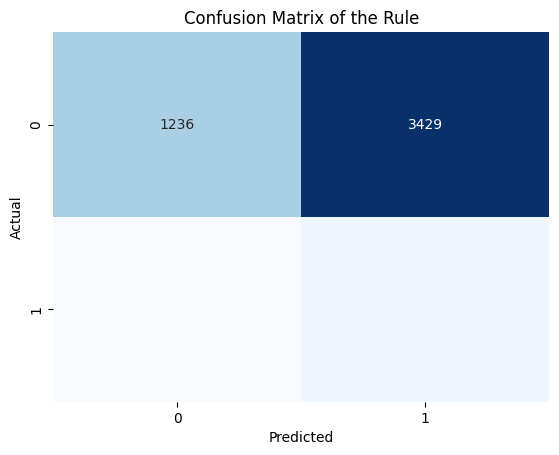

Accuracy: 0.2926


In [427]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
# Define the rule
# Replace this with your actual rule
def predict_major_mode(beats, bars):
    if 36.999 < beats <= 344.0 and 8.999 < bars <= 870:
        return 0
    else:
        return 1  # You may need to define rules for other classes

# Predict the mode for each row in X_test
y_test_pred = X_test.apply(lambda row: predict_major_mode(row['n_beats'], row['n_bars']), axis=1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Rule')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

In [85]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

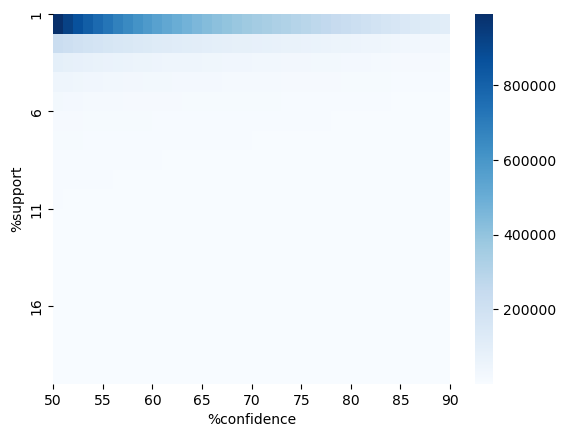

In [86]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

In [87]:
## FP-Growth

In [88]:
from fim import fpgrowth

In [89]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [90]:
supp = 2  # 2%
supp = 25  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(Irregular, False)",71.873333
1,"(Minor, False)",41.913333
2,"(Minor, Irregular, False)",32.186667
3,"(Minor, Irregular)",34.166667
4,"(nan, False)",36.720000
...,...,...
70,"(Moderate Popularity, Irregular)",25.480000
71,"(High Popularity, False)",31.073333
72,"(High Popularity, Irregular)",25.626667
73,"(Live Feel, False)",30.793333


In [91]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,False,"(Irregular,)",10781,71.873333,0.934634,0.998967
1,Irregular,"(False,)",10781,71.873333,0.768206,0.998967
2,False,"(Minor,)",6287,41.913333,0.943852,1.008820
3,False,"(Minor, Irregular)",4828,32.186667,0.942049,1.006893
4,Irregular,"(Minor, False)",4828,32.186667,0.767934,0.998614
...,...,...,...,...,...,...
136,False,"(Jazz,)",4162,27.746667,0.924889,0.988552
137,Irregular,"(Jazz, False)",3180,21.200000,0.764056,0.993571
138,Irregular,"(Jazz,)",3438,22.920000,0.764000,0.993498
139,False,"(Major,)",3586,23.906667,0.922088,0.985558


In [70]:
itemsets = apriori(X, target='s', supp=5, zmin=3, report='S')

In [71]:
itemsets[:5]

[(('10_key', 'Irregular', False), 5.166666666666667),
 (('4_key', 'Irregular', False), 5.2),
 (('6_key', 'Irregular', False), 5.153333333333333),
 (('Compound', 'Rhythmic', False), 5.026666666666666),
 (('11_key', 'Irregular', False), 5.779999999999999)]

In [72]:
# frequent itemset
itemsets[0][0]

('10_key', 'Irregular', False)

In [73]:
itemsets = apriori(X, target='m', supp=5, zmin=3, report='S')

In [74]:
# support
itemsets[0][1]

5.166666666666667

In [75]:
itemsets[:5]

[(('10_key', 'Irregular', False), 5.166666666666667),
 (('4_key', 'Irregular', False), 5.2),
 (('6_key', 'Irregular', False), 5.153333333333333),
 (('Compound', 'Rhythmic', False), 5.026666666666666),
 (('11_key', 'Irregular', False), 5.779999999999999)]

In [76]:
itemsets[0][0]

('10_key', 'Irregular', False)

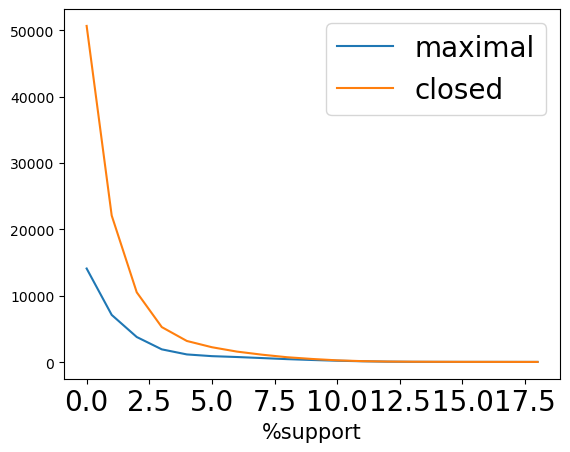

In [77]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

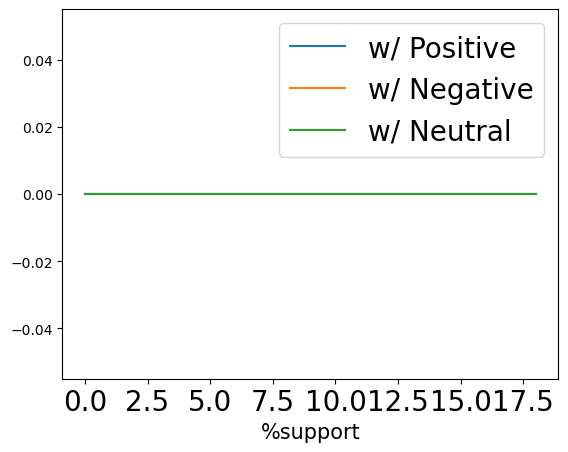

In [78]:
#papu from what I understand here makes me disgusted,
#why the length of the most frequent itemsets
#as you can see above it drops to 0 when the support percentage exceeds 50%, from what I understand it's not much  
filter_1 = []
filter_2 = []
filter_3 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
    filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
#filter for something interesting, (example item length set survivors and non-survivors)
plt.plot(filter_1, label='w/ Positive')
plt.plot(filter_2, label='w/ Negative')
plt.plot(filter_3, label='w/ Neutral')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()
# below you will instead see that the length of the frequent itemsets is 0 for positive and negative targets
# regardless of the percentage of support, this doesn't seem correct to me
# I must have made a mistake in the values

In [79]:
rules = apriori(X, target='r', supp=5, zmin=3, conf=60, report='aScl', eval='l', thresh=116.4, agg='m')

In [80]:
print(len(rules))

5956


In [81]:
rules[:5]

[('Highly Vocal',
  (True, 'Irregular'),
  576,
  3.84,
  0.7639257294429708,
  2.2931530801770186),
 ('Highly Acoustic',
  ('Compound', 'Rhythmic', False),
  468,
  3.1199999999999997,
  0.6206896551724138,
  1.8643061328766934),
 ('Highly Acoustic',
  ('Compound', 'Rhythmic'),
  472,
  3.1466666666666665,
  0.6043533930857875,
  1.8152384654158613),
 ('Highly Acoustic',
  ('Compound', False),
  667,
  4.446666666666667,
  0.6036199095022624,
  1.8130353709519296),
 ('Low Loudness',
  ('Compound', 'Rhythmic', False),
  525,
  3.5000000000000004,
  0.6962864721485411,
  2.0888594164456236)]

In [82]:
rules[0][0], rules[0][1]

('Highly Vocal', (True, 'Irregular'))

In [83]:
# asbolute support
rules[0][2]

576

In [84]:
# support as percentage
rules[0][3]

3.84

In [85]:
# confidence
rules[0][4]

0.7639257294429708

In [86]:
# lift
rules[0][5]

2.2931530801770186

In [87]:
#find all the rules where the target variable is implied
for r in rules:
    if r[0] == 'Neutral':
        print(r)

In [88]:
[r for r in rules if r[0] == 'Positive' or 'Negative' or 'Neutral']

[('Highly Vocal',
  (True, 'Irregular'),
  576,
  3.84,
  0.7639257294429708,
  2.2931530801770186),
 ('Highly Acoustic',
  ('Compound', 'Rhythmic', False),
  468,
  3.1199999999999997,
  0.6206896551724138,
  1.8643061328766934),
 ('Highly Acoustic',
  ('Compound', 'Rhythmic'),
  472,
  3.1466666666666665,
  0.6043533930857875,
  1.8152384654158613),
 ('Highly Acoustic',
  ('Compound', False),
  667,
  4.446666666666667,
  0.6036199095022624,
  1.8130353709519296),
 ('Low Loudness',
  ('Compound', 'Rhythmic', False),
  525,
  3.5000000000000004,
  0.6962864721485411,
  2.0888594164456236),
 ('Low Loudness',
  ('Compound', 'Rhythmic'),
  530,
  3.5333333333333337,
  0.678617157490397,
  2.0358514724711907),
 ('Low Loudness',
  ('Compound', False),
  706,
  4.706666666666667,
  0.6389140271493212,
  1.9167420814479639),
 ('Low Energy',
  ('Compound', 'Rhythmic', False),
  492,
  3.2800000000000002,
  0.6525198938992043,
  1.9540424053679504),
 ('Low Energy',
  ('Compound', 'Rhythmic'),


In [89]:
print( 'to_predict:', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][0])
print( 'how?', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][1])

to_predict: Highly Vocal
how? (True, 'Irregular')


In [90]:
#overview
filter_1 = []
filter_2 = []
filter_3 = []
len_r = []
for i in range(1, 20+1): #support values
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
         
        filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
        filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
        filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
        
    len_r.append(len_r_wrt_i)

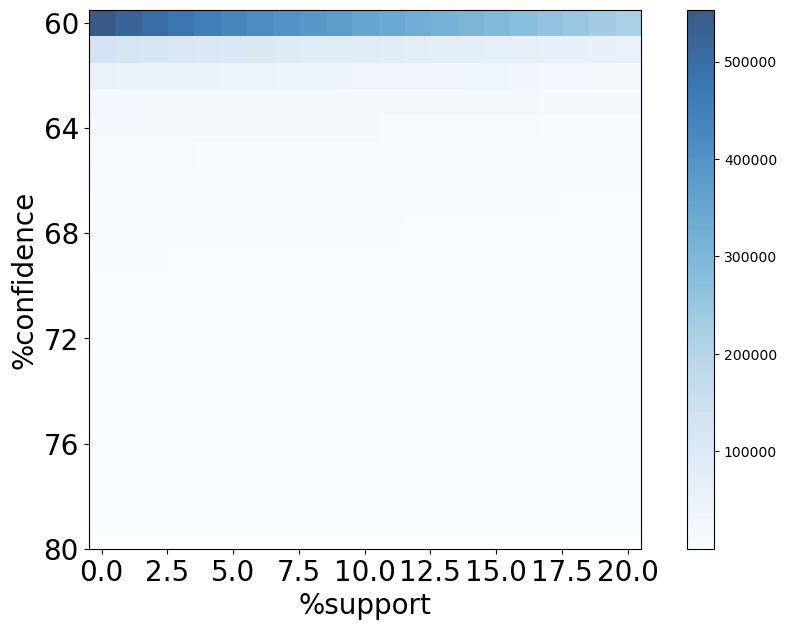

In [91]:
# Set the size of the figure (adjust width as needed)
plt.figure(figsize=(12,7))
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree # export_graphviz() method

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
rule_to_test = None  # Initializing rule_to_test before the loop
for r in rules:
    if r[0] == 'Neutral':
        rule_to_test = r
        break

if rule_to_test is not None:
    # Use rule_to_test here
    print(rule_to_test)
else:
    print("No rule found with the condition 'Neutral'")


No rule found with the condition 'Neutral'


In [38]:
df_class = pd.read_csv("C:/Users/Amir Hassan/Desktop/Python/train.csv", skipinitialspace=True)
df_train = df_class.drop(["name","explicit", "loudness","duration_ms", "popularity", "popularity_confidence","features_duration_ms","n_beats","processing","tempo","n_bars", "mode", "artists", "album_name", "genre"], axis=1)
attributes = [col for col in df_train.columns if col != 'time_signature']
X = df_train[attributes].values
y = df_train['key']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [39]:
X_test[0][0] # concreteness

0.537

In [40]:
X_test[0][1] #imageability

0.884

In [41]:
df_train.head()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,time_signature
0,0.690,0.513,5,0.0975,0.302000,0.53600,0.281,0.6350,4.0
1,0.069,0.196,1,0.0805,0.283000,0.93400,0.360,0.0336,4.0
2,0.363,0.854,2,0.0397,0.000089,0.80000,0.262,0.4890,4.0
3,0.523,0.585,5,0.0765,0.066400,0.00127,0.117,0.3850,4.0
4,0.643,0.687,7,0.0539,0.000576,0.09690,0.299,0.6370,4.0


In [42]:
y_pred_test = []
for index, row in enumerate(X_test):
    if row[0] <= 5.5 and row[0] >= 3.606 and row[1] <=5.606  and row[1] >= 3.879:
        y_pred_test.append(1.0)
    else:
        y_pred_test.append(0.0)

In [43]:
y_pred_test = []
for index, row in enumerate(X_test):
    if row[0] <= 5.5 and row[0] >= 3.606 and row[1] <=5.606  and row[1] >= 3.879:
        y_pred_test.append(1.0)
    else:
        y_pred_test.append(0.0)

In [44]:
new_y = []
for y in y_test:
    if(y == 1.0):
        new_y.append(1.0)
    else:
        new_y.append(0.0)

In [45]:
len(new_y) - len(y_pred_test)

0

In [46]:
# print(classification_report(new_y, y_pred_test))
print(classification_report(new_y, y_pred_test, zero_division=1))  # or zero_division=0

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94      4030
         1.0       1.00      0.00      0.00       470

    accuracy                           0.90      4500
   macro avg       0.95      0.50      0.47      4500
weighted avg       0.91      0.90      0.85      4500



In [47]:
print("END PATTERN2 MINING")

END PATTERN2 MINING
